In [ ]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O, etc. (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization library
import matplotlib.image as mpimg # Visualization library
%matplotlib inline

np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
# tensorflow keras machine learning library
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


# Data is accessible with read-only permissions in the "../input/" folder.
# For example, running this code with Shift+Enter command click will show all files in the input folder according to the Python function content.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/knou-mid-term-test/sample_submission.csv
/kaggle/input/knou-mid-term-test/train.csv
/kaggle/input/knou-mid-term-test/test.csv


In [2]:
train = pd.read_csv('../input/knou-mid-term-test/train.csv')
test = pd.read_csv('../input/knou-mid-term-test/test.csv')

In [3]:
Y_train = train["label"]
X_train = train.drop(["label"], axis=1)

Y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [4]:
X_train.isnull().sum().sum()

0

In [5]:
X_train = X_train.astype('float32') / 255.0
test = test.astype('float32') / 255.0

In [6]:
X_train = X_train.values.reshape((-1,28,28,1))
test = test.values.reshape((-1,28,28,1))

In [7]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [8]:
random_seed = 2

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

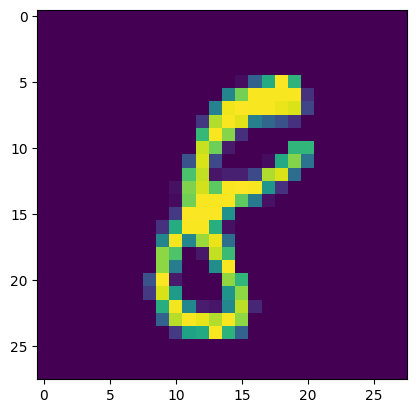

In [10]:
image = X_train[0]
plt.imshow(image) 

In [11]:
input_shape = (28,28,1)
num_classes = 10

model = Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
batch_size = 128
epochs = 15

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
266/266 [==============================] - 16s 57ms/step - loss: 0.4815 - accuracy: 0.8548 - val_loss: 0.1293 - val_accuracy: 0.9640
Epoch 2/15
266/266 [==============================] - 15s 56ms/step - loss: 0.1381 - accuracy: 0.9584 - val_loss: 0.0851 - val_accuracy: 0.9778
Epoch 3/15
266/266 [==============================] - 15s 57ms/step - loss: 0.0970 - accuracy: 0.9707 - val_loss: 0.0753 - val_accuracy: 0.9791
Epoch 4/15
266/266 [==============================] - 14s 54ms/step - loss: 0.0820 - accuracy: 0.9743 - val_loss: 0.0612 - val_accuracy: 0.9823
Epoch 5/15
266/266 [==============================] - 15s 55ms/step - loss: 0.0711 - accuracy: 0.9781 - val_loss: 0.0524 - val_accuracy: 0.9839
Epoch 6/15
266/266 [==============================] - 14s 54ms/step - loss: 0.0618 - accuracy: 0.9806 - val_loss: 0.0487 - val_accuracy: 0.9870
Epoch 7/15
266/266 [==============================] - 15s 55ms/step - loss: 0.0545 - accuracy: 0.9837 - val_loss: 0.0477 - val_accuracy:

In [14]:
results = model.predict(test)

875/875 [==============================] - 4s 5ms/step


In [15]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [16]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [17]:
submission.to_csv('submission.csv', index=False)